Author: Xinnan Shen<br>
Date: 05-05-2020

# Learned Index Model Simple Demo
This notebook is to build some simple learned index models based on Kraska's paper.

Step 1: Generate some simple dataset in csv format

In [1]:
import os
import codecs
import random
#function: data_generation
#usage: generate a simple dataset
#parameters:
#1.len_num: the size of dataset
#2.range_min: the minimum key
#3.range_max: the maximun key
#output dataset: two columns (key,location)
def data_generation(len_num,range_min,range_max):
	datalist=[]
	for i in range(0,len_num):
		x=random.randint(range_min,range_max)
		datalist.append(x)
	for i in range(0,len(datalist)):
		temp=False
		for j in range(0,len(datalist)-i-1):
			if datalist[j]>datalist[j+1]:
				t=datalist[j]
				datalist[j]=datalist[j+1]
				datalist[j+1]=t
				temp=True
		if not temp:
			break
	current_path=os.path.abspath(os.curdir)
	f=codecs.open(os.path.join(current_path,"data.csv"), "w", "utf-8")
	for i in range(0,len(datalist)):
		f.write(str(datalist[i])+","+str(i)+"\n")
	f.close()
	return

Provide some value and generate the dataset

In [2]:
minkey=1000
maxkey=9999
keynum=3000
data_generation(3000,1000,9999)

Step 2: Split the dataset into training, development and testing dataset

In [3]:
from random import shuffle
import numpy as np
from sklearn.model_selection import train_test_split
current_path=os.path.abspath(os.curdir)
f=codecs.open(os.path.join(current_path,"data.csv"), "r", "utf-8")
strlist=f.read().split("\n")
f.close()
list_key=[]
list_res=[]
for ele in strlist:
    temp=ele.split(",")
    if len(temp)!=2:
        continue
    list_key.append(temp[0])
    list_res.append(temp[1])
keys=np.array(list_key)
res=np.array(list_res)
trainkeys,testkeys,trainres,testres=train_test_split(keys,res,test_size=0.35)
trainkeys,devkeys,trainres,devres=train_test_split(trainkeys,trainres,test_size=0.5)
trainkeys=list(trainkeys)
devkeys=list(devkeys)
testkeys=list(testkeys)
trainres=list(trainres)
devres=list(devres)
testres=list(testres)

f=codecs.open(os.path.join(current_path,"data_train.csv"), "w", "utf-8")
for i in range(0,len(trainkeys)):
    f.write(str(trainkeys[i])+","+str(trainres[i])+"\n")
f.close()
f=codecs.open(os.path.join(current_path,"data_dev.csv"), "w", "utf-8")
for i in range(0,len(devkeys)):
    f.write(str(devkeys[i])+","+str(devres[i])+"\n")
f.close()
f=codecs.open(os.path.join(current_path,"data_test.csv"), "w", "utf-8")
for i in range(0,len(testkeys)):
    f.write(str(testkeys[i])+","+str(testres[i])+"\n")
f.close()
print("training data size:",len(trainkeys))
print("development data size:",len(devkeys))
print("testing data size:",len(testkeys))

training data size: 975
development data size: 975
testing data size: 1050


In [4]:
import codecs
import os
minkey=1000
maxkey=9999
keynum=3000
current_path=os.path.abspath(os.curdir)
f=codecs.open(os.path.join(current_path,"data_train.csv"), "r", "utf-8")
strlist=f.read().split("\n")
f.close()
trainkeys=[]
trainres=[]
for ele in strlist:
    temp=ele.split(",")
    if len(temp)!=2:
        continue
    trainkeys.append(int(temp[0]))
    trainres.append(int(temp[1]))
f=codecs.open(os.path.join(current_path,"data_dev.csv"), "r", "utf-8")
strlist=f.read().split("\n")
f.close()
devkeys=[]
devres=[]
for ele in strlist:
    temp=ele.split(",")
    if len(temp)!=2:
        continue
    devkeys.append(int(temp[0]))
    devres.append(int(temp[1]))
f=codecs.open(os.path.join(current_path,"data_test.csv"), "r", "utf-8")
strlist=f.read().split("\n")
f.close()
testkeys=[]
testres=[]
for ele in strlist:
    temp=ele.split(",")
    if len(temp)!=2:
        continue
    testkeys.append(int(temp[0]))
    testres.append(int(temp[1]))
print("training data size:",len(trainkeys))
print("development data size:",len(devkeys))
print("testing data size:",len(testkeys))

training data size: 975
development data size: 975
testing data size: 1050


Step 4: Build a Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error 
import math
import time
print("Linear Regression Model")
t1=time.time()
reg = LinearRegression()
reg.fit(np.array(trainkeys).reshape(-1,1),np.array(trainres).reshape(-1,1))
t2=time.time()
time_interval=t2-t1
print("time interval for building model:"+str(time_interval*1000)+" ms")
devpre=reg.predict(np.array(devkeys).reshape(-1,1)).reshape(1,-1).tolist()[0]
for i in range(0,len(devpre)):
    devpre[i]=abs(int(devpre[i]))%keynum
mse_LR=mean_squared_error(devres,devpre)
print("log MSE dev: ",round(math.log(mse_LR,2),3))
t1=time.time()
testpre=reg.predict(np.array(testkeys).reshape(-1,1)).reshape(1,-1).tolist()[0]
for i in range(0,len(testpre)):
    testpre[i]=abs(int(testpre[i]))%keynum
t2=time.time()
time_interval=t2-t1
print("time interval for indexing data:"+str(time_interval*1000)+" ms")
# print("log MSE test: ",round(math.log(1+mean_squared_error(testres,testpre),2),3))

Linear Regression Model
time interval for building model:1.7642974853515625 ms
log MSE dev:  15.168
time interval for indexing data:0.8897781372070312 ms


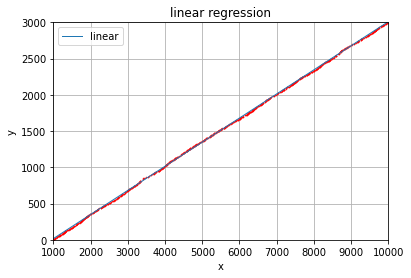

In [7]:
import matplotlib.pyplot as plt
x=np.array(trainkeys).reshape(-1,1)
y=np.array(trainres).reshape(-1,1)
x1=np.array([1000, 10000]).reshape(-1,1)
y1=reg.predict(x1)
plt.plot(x, y, 'r.',markersize =1)
plt.title('linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([1000, 10000, 0, 3000])
plt.grid(True)
plt.plot(x1, y1,label = 'linear',lw=1)
plt.legend()

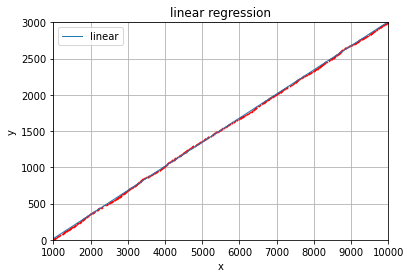

In [8]:
import matplotlib.pyplot as plt
x=np.array(devkeys).reshape(-1,1)
y=np.array(devres).reshape(-1,1)
x1=np.array([1000, 10000]).reshape(-1,1)
y1=reg.predict(x1)
plt.plot(x, y, 'r.',markersize =1)
plt.title('linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([1000, 10000, 0, 3000])
plt.grid(True)
plt.plot(x1, y1,label = 'linear',lw=1)
plt.legend()

Step 5: Build a SVR model

In [ ]:
# from sklearn.svm import SVR
# print("Support Vector Regression Model")
# clf_best=None
# hp_best={}
# best_mse=9999.99
# for kernel_ in ['rbf', 'sigmoid']:
#     for gamma_ in [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
#         for C_ in [1, 3, 5, 10, 30, 50, 100, 300, 500, 1000, 3000, 5000, 10000, 30000, 50000]:
#             clf = SVR(kernel=kernel_,gamma=gamma_,C=C_)
#             clf.fit(np.array(trainkeys).reshape(-1,1),np.array(trainres).reshape(-1,1))
#             devpre=clf.predict(np.array(devkeys).reshape(-1,1)).reshape(1,-1).tolist()[0]
#             for i in range(0,len(devpre)):
#                 devpre[i]=abs(int(devpre[i]))%keynum
#             mse_SVR=mean_squared_error(devres,devpre)
#             print("hyper-parameters: ",{'kernel':kernel_,'gamma':gamma_,'C':C_},"log MSE: ",round(math.log(mse_SVR,2),3))
#             if mse_SVR<best_mse:
#                 best_mse=mse_SVR
#                 hp_best={'kernel':kernel_,'gamma':gamma_,'C':C_}
#                 clf_best=clf
# print("hyper-parameters of best model:",hp_best,"log MSE: ",round(math.log(best_mse,2),3))

SVM: kernel=linear

In [9]:
from sklearn.svm import SVR
print("Support Vector Regression Model: kernel=linear")
t1=time.time()
clf = SVR(kernel='linear')
clf.fit(np.array(trainkeys).reshape(-1,1),np.array(trainres).reshape(-1,1))
t2=time.time()
time_interval_1=t2-t1
print("time interval for building model:"+str(time_interval_1*1000)+" ms")
t1=time.time()
devpre=clf.predict(np.array(devkeys).reshape(-1,1)).reshape(1,-1).tolist()[0]
for i in range(0,len(devpre)):
    devpre[i]=abs(int(devpre[i]))%keynum
MSE_linear=round(math.log(1+mean_squared_error(devres,devpre),2),3)
print("log MSE dev: ",MSE_linear)
t2=time.time()
time_interval_2=t2-t1
print("time interval for indexing data:"+str(time_interval_2*1000)+" ms")
time_interval_linear=time_interval_1+time_interval_2

Support Vector Regression Model: kernel=linear


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time interval for building model:445215.42096138 ms
log MSE dev:  15.167
time interval for indexing data:7.879972457885742 ms


SVM: kernel=poly

In [10]:
from sklearn.svm import SVR
print("Support Vector Regression Model: kernel=poly")
t1=time.time()
clf = SVR(kernel='poly')
clf.fit(np.array(trainkeys).reshape(-1,1),np.array(trainres).reshape(-1,1))
t2=time.time()
time_interval_1=t2-t1
print("time interval for building model:"+str(time_interval_1*1000)+" ms")
devpre=clf.predict(np.array(devkeys).reshape(-1,1)).reshape(1,-1).tolist()[0]
for i in range(0,len(devpre)):
    devpre[i]=abs(int(devpre[i]))%keynum
MSE_poly=round(math.log(1+mean_squared_error(devres,devpre),2),3)
print("log MSE dev: ",MSE_poly)
t1=time.time()
testpre=clf.predict(np.array(testkeys).reshape(-1,1)).reshape(1,-1).tolist()[0]
for i in range(0,len(testpre)):
    testpre[i]=abs(int(testpre[i]))%keynum
t2=time.time()
time_interval_2=t2-t1
print("time interval for indexing data:"+str(time_interval_2*1000)+" ms")
time_interval_poly=time_interval_1+time_interval_2

Support Vector Regression Model: kernel=poly
time interval for building model:71.34890556335449 ms
log MSE dev:  19.502
time interval for indexing data:8.105278015136719 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM: kernel=rbf

In [11]:
from sklearn.svm import SVR
print("Support Vector Regression Model: kernel=rbf")
t1=time.time()
clf = SVR(kernel='rbf')
clf.fit(np.array(trainkeys).reshape(-1,1),np.array(trainres).reshape(-1,1))
t2=time.time()
time_interval_1=t2-t1
print("time interval for building model:"+str(time_interval_1*1000)+" ms")
devpre=clf.predict(np.array(devkeys).reshape(-1,1)).reshape(1,-1).tolist()[0]
for i in range(0,len(devpre)):
    devpre[i]=abs(int(devpre[i]))%keynum
MSE_rbf=round(math.log(1+mean_squared_error(devres,devpre),2),3)
print("log MSE dev: ",MSE_rbf)
t1=time.time()
testpre=clf.predict(np.array(testkeys).reshape(-1,1)).reshape(1,-1).tolist()[0]
for i in range(0,len(testpre)):
    testpre[i]=abs(int(testpre[i]))%keynum
t2=time.time()
time_interval_2=t2-t1
print("time interval for indexing data:"+str(time_interval_2*1000)+" ms")
time_interval_rbf=time_interval_1+time_interval_2

Support Vector Regression Model: kernel=rbf
time interval for building model:69.43130493164062 ms
log MSE dev:  18.625
time interval for indexing data:23.9717960357666 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM: kernel=sigmoid

In [12]:
from sklearn.svm import SVR
print("Support Vector Regression Model: kernel=sigmoid")
t1=time.time()
clf = SVR(kernel='sigmoid')
clf.fit(np.array(trainkeys).reshape(-1,1),np.array(trainres).reshape(-1,1))
t2=time.time()
time_interval_1=t2-t1
print("time interval for building model:"+str(time_interval_1*1000)+" ms")
devpre=clf.predict(np.array(devkeys).reshape(-1,1)).reshape(1,-1).tolist()[0]
for i in range(0,len(devpre)):
    devpre[i]=abs(int(devpre[i]))%keynum
MSE_sigmoid=round(math.log(1+mean_squared_error(devres,devpre),2),3)
print("log MSE dev: ",MSE_sigmoid)
t1=time.time()
testpre=clf.predict(np.array(testkeys).reshape(-1,1)).reshape(1,-1).tolist()[0]
for i in range(0,len(testpre)):
    testpre[i]=abs(int(testpre[i]))%keynum
t2=time.time()
time_interval_2=t2-t1
print("time interval for indexing data:"+str(time_interval_2*1000)+" ms")
time_interval_sigmoid=time_interval_1+time_interval_2

Support Vector Regression Model: kernel=sigmoid
time interval for building model:73.42123985290527 ms
log MSE dev:  19.732
time interval for indexing data:40.550947189331055 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


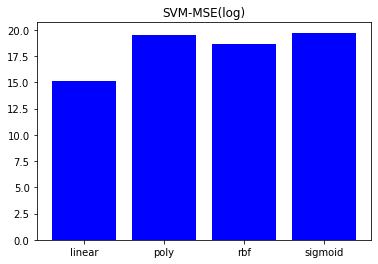

In [13]:
import matplotlib.pyplot as plt
kernels_list = ['linear','poly','rbf','sigmoid']
MSE_list = [MSE_linear, MSE_poly, MSE_rbf, MSE_sigmoid]
plt.title('SVM-MSE(log)')
plt.bar(range(len(MSE_list)), MSE_list,color='b', tick_label=kernels_list)
plt.show()

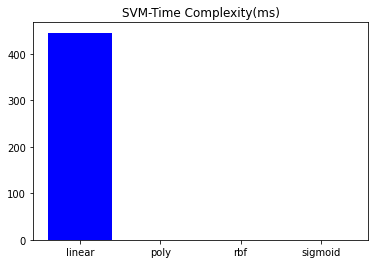

In [14]:
import matplotlib.pyplot as plt
kernels_list = ['linear','poly','rbf','sigmoid']
time_interval_list = [time_interval_linear, time_interval_poly, time_interval_rbf, time_interval_sigmoid]
plt.title('SVM-Time Complexity(ms)')
plt.bar(range(len(time_interval_list)), time_interval_list,color='b', tick_label=kernels_list)
plt.show()